In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import SGD, Adam

In [24]:
#Building the dataset:
#Start with small T and increase later.
#T = 10
#T = 20
T = 30
D = 1
X = []
Y = []

#label of sequence using i1, i2, i3 as dependencies(XOR problem in 3-D):
def get_label(x, i1, i2, i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 0
    elif x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 0
    elif x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 0
    elif x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 0
    else:
        return 1
    
#generation of time series:
for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    #y = get_label(x, -1, -2, -3) #Short Dist.
    y = get_label(x, 0, 1, 2) #Long Dist.
    #Can also take values at 3 random positions(non-consecutive) from the sequence.
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)
print(X.shape)

(5000, 30)


In [25]:
#SimpleRNN
inputs = np.expand_dims(X, -1)

i = Input(shape = (T, D))
#Method 1:
#x = SimpleRNN(5)(i)
#x = GRU(5)(i)
#x = LSTM(5)(i)

#Method 2:
x = LSTM(5, return_sequences = True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate = 0.01),
    #optimizer = 'rmsprop',
    #optimizer = 'adam',
    #optimizer = SGD(lr = 0.1, momentum = 0.9),
    metrics = ['accuracy']
)

In [26]:
r = model.fit(
    inputs, Y,
    epochs = 200, # 400 for GRU with T = 20, and 200 otherwise(maybe more).
    validation_split = 0.5
)

Epoch 1/200
79/79 [==============================] - 3s 19ms/step - loss: 0.6935 - accuracy: 0.5108 - val_loss: 0.6930 - val_accuracy: 0.5156
Epoch 2/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6938 - accuracy: 0.5040 - val_loss: 0.6924 - val_accuracy: 0.5160
Epoch 3/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6947 - accuracy: 0.4920 - val_loss: 0.6949 - val_accuracy: 0.4832
Epoch 4/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6934 - accuracy: 0.5088 - val_loss: 0.6926 - val_accuracy: 0.5156
Epoch 5/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6931 - accuracy: 0.5036 - val_loss: 0.6926 - val_accuracy: 0.5156
Epoch 6/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6930 - accuracy: 0.5144 - val_loss: 0.6952 - val_accuracy: 0.4784
Epoch 7/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6928 - accuracy: 0.5008 - val_loss: 0.6937 - val_accuracy: 0.4888
Epoch 

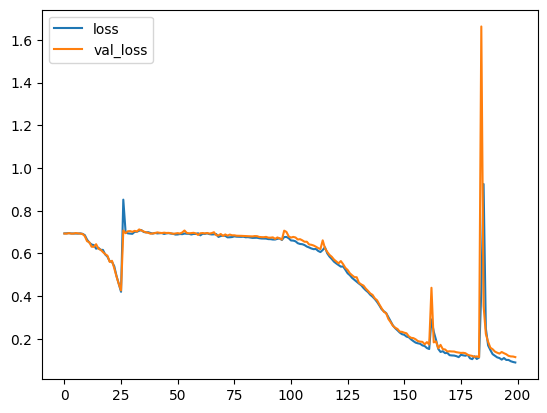

In [27]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show() 

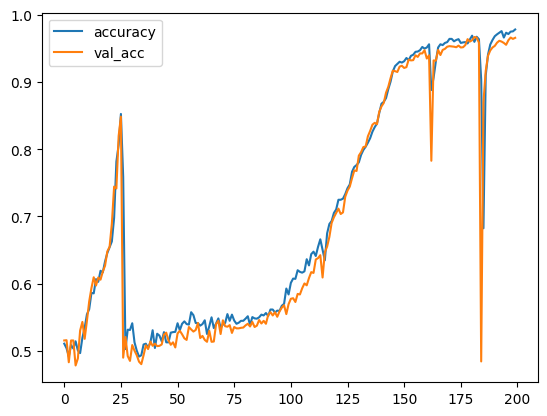

In [28]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show() 

##### SimpleRNN
SimpleRNN units can learn short term dependencies very easily.
Accuracy reduces for long-term dependencies due to the vanishing gradients(further back in the sequence you are, harder it is to determine influence to results).
For T = 20, accuracy reduces greatly to about 50%.

##### GRU
Takes about 400 epochs to get to a good accuracy for T=20(Long term dependencies), about twice as much as that required by LSTM.

##### LSTM
Boasts a much better accuracy for long-term dependencies.
For T = 20, we see the loss and accuracy curves taking longer to optimise, but eventually gives same performance.
For T = 30, LSTM is able to learn and give high accuracy only with return_sequences = True and GlobalMaxPooling1D, with lesser epochs required.
